# Pizza Price Data

https://www.kaggle.com/datasets/knightbearr/pizza-price-prediction-real-data/data



# Loading the Data

In [ ]:
import pandas as pd
import random

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
data = pd.read_csv('/content/sample_data/pizza_data.csv')

'''
mask = random.sample(range(len(data)), int(len(data) * 0.5))  # Blank 50% of sizes
data.loc[mask, 'Size'] = ''
'''
# Display the first few rows of the dataset
print(data.head())


          Company          Pizza Name           Type          Size  Price
0  Domino's Pizza         Hand Tossed  Cheeses Pizza   Small (10")  $5.99
1  Domino's Pizza         Hand Tossed  Cheeses Pizza  Medium (12")  $7.99
2  Domino's Pizza         Hand Tossed  Cheeses Pizza   Large (14")  $9.99
3  Domino's Pizza        Handmade Pan  Cheeses Pizza  Medium (12")  $7.99
4  Domino's Pizza  Crunchy Thin Crust  Cheeses Pizza   Small (10")  $5.99


# Supervised Learning Regression problem

In [ ]:
# Label encoding for categorical features
label_encoders = {}
for column in ['Company', 'Pizza Name', 'Type', 'Size']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])

    # le.fit(data[column].copy())   # Fit on a copy of the column to preserve original data
    label_encoders[column] = le

# Split the data into features (X) and target (y)
X = data.drop('Price', axis=1)
y = data['Price']

# Scale the features aka Normalize the features to improve model performance.
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

import numpy as np # Import numpy for numerical operations
# Convert y_train to float32
y_train = y_train.str.replace('$', '').str.replace(',', '').astype(np.float32)
y_test = y_test.str.replace('$', '').str.replace(',', '').astype(np.float32)




# Building a simple neural network using TensorFlow Model's Keras API.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

## Build the model
# Define the input shape explicitly
input_shape = (X_train.shape[1],)

# Build the model starting with an Input layer
model = models.Sequential([
    layers.Input(shape=input_shape),  # Use Input layer to specify input shape
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Summary of the model
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,433 (9.50 KB)

 Trainable params: 2,433 (9.50 KB)

 Non-trainable params: 0 (0.00 B)

# Training the Model

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32)


Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 298.2751 - mae: 16.3179 - val_loss: 255.9082 - val_mae: 15.0448
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 289.8473 - mae: 15.8907 - val_loss: 243.0034 - val_mae: 14.6062
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 257.0738 - mae: 15.0558 - val_loss: 227.7030 - val_mae: 14.0694
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 249.7642 - mae: 14.6521 - val_loss: 209.9666 - val_mae: 13.4256
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 237.1194 - mae: 14.2430 - val_loss: 189.5469 - val_mae: 12.6419
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 208.4711 - mae: 13.2072 - val_loss: 167.2127 - val_mae: 11.7261
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 193.7896 - mae: 12.6065 - val_loss: 143.6664 - val_mae: 10.6986
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 161.9772 - mae: 11.2725 - val_loss: 119.3277 - val_mae: 9.5582
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━

# Evaluating the Model
Evaluate the model on the test set to see how well it generalizes.

*Here's how it works:*

**Calculate Errors**: For each data point in your dataset, the model predicts a value. MAE calculates the absolute difference (ignoring the sign, so always positive) between the predicted value and the actual (true) value.

**Average the Errors**: It then takes the average of all these absolute errors.

In [ ]:
# Evaluate the model on the test data with "MAE" or Mean Absolute Error
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f'Test MAE: {test_mae}')


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10.9296 - mae: 2.5593 
Test MAE: 2.558295249938965


compute the average pizza

In [ ]:
import pandas as pd

# Assuming 'y' is your pandas Series containing the prices (after converting them to numeric type)
average_price = y_numeric.mean()

print(f"The average pizza price is: ${average_price:.2f}")

The average pizza price is: $16.32


To examine the target price ('Price' column) and plot its distribution

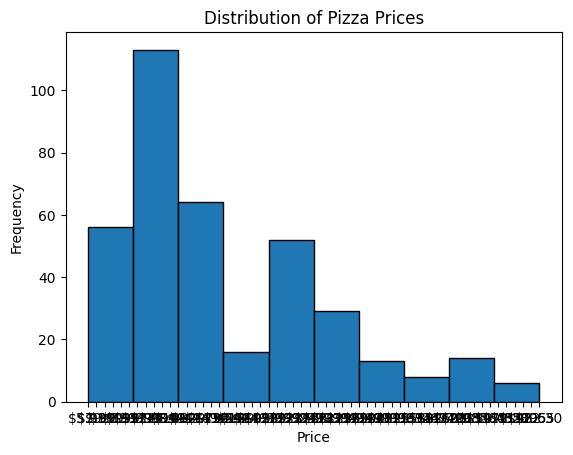

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'y' is your target variable (Price) as a pandas Series
plt.hist(y, bins=10, edgecolor='black')
plt.title('Distribution of Pizza Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


To determine if most prices fall within a specific range

In [ ]:
import pandas as pd

# Assuming 'y' is your pandas Series containing the prices
lower_bound = 10
upper_bound = 20

y_numeric = y.str.replace('$', '').astype(float) # Convert prices to numeric type

count_within_range = ((y_numeric >= lower_bound) & (y_numeric <= upper_bound)).sum()
total_count = len(y_numeric)

percentage_within_range = (count_within_range / total_count) * 100

print(f"Percentage of prices between {lower_bound} and {upper_bound}: {percentage_within_range:.2f}%")

Percentage of prices between 10 and 20: 67.65%


# Making Predictions

In [ ]:
# Example new data for prediction
new_data = pd.DataFrame({
    'Company': ['Domino\'s Pizza'],
    'Pizza Name': ['Crunchy Thin Crust'],
    'Type': ['Cheeses Pizza'],
    'Size': ['10"']
})

# Convert all values in categorical columns to strings
for col in ['Company', 'Pizza Name', 'Type', 'Size']:
    data[col] = data[col].astype(str)
    new_data[col] = new_data[col].astype(str)

# Transform categorical features using label encoders
label_encoders = {}
for col in ['Company', 'Pizza Name', 'Type', 'Size']:
    label_encoders[col] = LabelEncoder()
    all_data = pd.concat([data[col], new_data[col]], ignore_index=True)
    label_encoders[col].fit(all_data)
    new_data[col] = label_encoders[col].transform(new_data[col])


# Scale the new data
new_data_scaled = scaler.transform(new_data)

# Predict the price
predicted_price = model.predict(new_data_scaled)
print(f'Predicted Price: ${predicted_price[0][0]:.2f}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted Price: $21.97


# Visualizing Training History

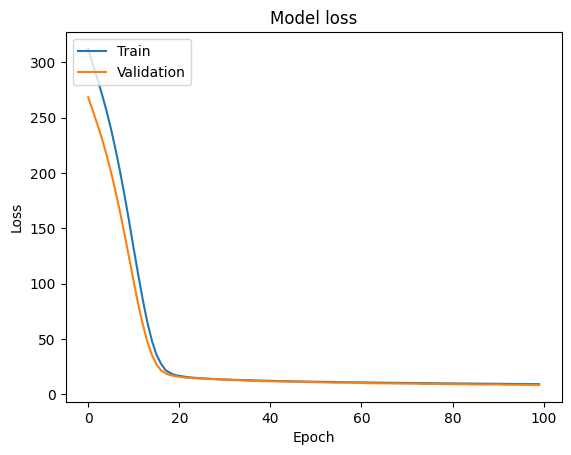

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
# Loop through each layer in the model
for i, layer in enumerate(model.layers):
    # Get the weights and biases for the layer
    weights, biases = layer.get_weights()

    print(f"Layer {i+1}:")
    print(f"Weights (W{i+1}):\n{weights}")
    print(f"Biases (b{i+1}):\n{biases}")
    print("\n")


Layer 1:
Weights (W1):
[[-1.46901876e-01 -1.67276058e-02 -1.02658086e-01 -1.03161477e-01
  -1.84924334e-01 -1.30846798e-01 -9.23543796e-02 -5.87780438e-02
  -2.23022196e-02 -1.75680220e-01  2.42288619e-01 -3.50702196e-01
  -3.06180507e-01 -5.26039153e-02 -3.03792413e-02  1.10234413e-02
   2.41117150e-01 -8.99014920e-02  5.16989529e-02 -1.61146238e-01
   2.44926795e-01 -2.11159512e-02  1.41817108e-01  1.46076635e-01
  -2.61708349e-01  1.29760876e-01 -1.91689000e-01  5.75742908e-02
   1.03221968e-01  3.00594300e-01  1.25123352e-01 -3.29877168e-01
  -3.02289218e-01 -1.12386130e-01 -1.71498448e-01  1.46229893e-01
   3.50810885e-01  1.30935237e-01 -1.59549773e-01  8.02447051e-02
  -1.92660272e-01  5.90481497e-02 -3.58058512e-01 -1.61524415e-01
   2.51962036e-01  1.69029683e-01  2.36227274e-01  1.11087747e-01
   1.71237230e-01  1.65924221e-01 -2.33639687e-01  1.07100368e-01
  -1.15682103e-01 -1.03819959e-01 -2.83251017e-01  1.94185317e-01
  -5.37515916e-02 -9.31685120e-02  1.57288864e-01  3.

In [ ]:
# Extract weights and biases from the final layer
final_weights, final_biases = model.layers[-1].get_weights()

# Print the learned equation for the output layer
print("Final Output Layer Equation:")
print(f"Price Prediction = {final_weights.flatten()} * A2 + {final_biases}")


Final Output Layer Equation:
Price Prediction = [ 0.31566784 -0.39681503  0.5218971  -0.36316    -0.2330893   0.4218233
 -0.19740148 -0.09696387 -0.23671946  0.41881523 -0.10301423  0.15710187
 -0.23467417  0.4988946  -0.38566652 -0.13865335  0.37022704  0.4524468
  0.29526535 -0.15644667 -0.46071777  0.5336614   0.21727626 -0.28798476
 -0.37586197  0.20052727  0.37072408  0.5045357   0.34261894 -0.37936032
 -0.35851708  0.01738615] * A2 + [0.11130292]


# Model Recap
The neural network has three layers:

**First Hidden Layer**: 64 neurons with ReLU
activation.
**Second Hidden Layer**: 32 neurons with ReLU activation.
**Output Layer**: 1 neuron for predicting the price.

# Layer Computations
**Input Layer**:
Let the input features (e.g., Company, Pizza Name, Type, Size) be represented by
𝑋
X.

**First Hidden Layer**:
𝑍
1
=
𝑊
1
⋅
𝑋
+
𝑏
1
Z
1
​
 =W
1
​
 ⋅X+b
1
​


𝐴
1
=
ReLU
(
𝑍
1
)
A
1
​
 =ReLU(Z
1
​
 )
𝑍
1
Z
1
​
  is the linear transformation of the inputs.
𝐴
1
A
1
​
  is the output after applying the ReLU activation function to
𝑍
1
Z
1
​
 .
**Second Hidden Layer**:
𝑍
2
=
𝑊
2
⋅
𝐴
1
+
𝑏
2
Z
2
​
 =W
2
​
 ⋅A
1
​
 +b
2
​


𝐴
2
=
ReLU
(
𝑍
2
)
A
2
​
 =ReLU(Z
2
​
 )
𝑍
2
Z
2
​
  is the linear transformation of the activations from the first hidden layer.
𝐴
2
A
2
​
  is the output after applying the ReLU activation function to
𝑍
2
Z
2
​
 .
**Output Layer**:
Price Prediction=𝑍3=𝑊3⋅𝐴2+𝑏3

𝑍
3
Z
3
​
  is the linear transformation of
𝐴
2
A
2
​
 .
**The final predicted price** is obtained from
𝑍
3
Z
3
​
 .

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(data, columns=['Company', 'Pizza Name', 'Type', 'Size'])

print(df)

    Company Pizza Name Type Size
0         0         96    1    8
1         0         96    1    4
2         0         96    1    2
3         0         98    1    4
4         0         75    1    8
..      ...        ...  ...  ...
366       2         15    8    9
367       2         82    8    8
368       2         82    8    4
369       2         82    8    2
370       2         82    8    9

[371 rows x 4 columns]


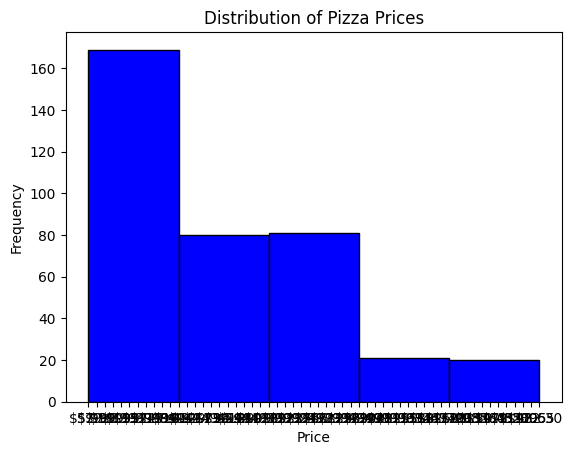

In [ ]:
import matplotlib.pyplot as plt

# Simple histogram of the target variable (Price)
plt.hist(y, bins=5, color='blue', edgecolor='black')
plt.title('Distribution of Pizza Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


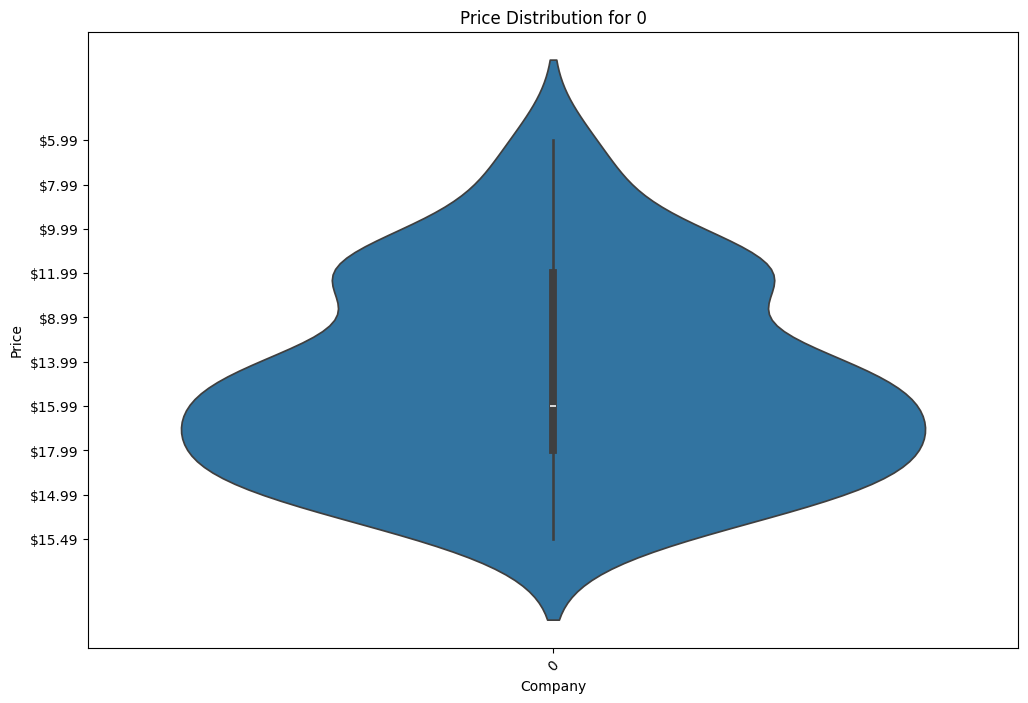

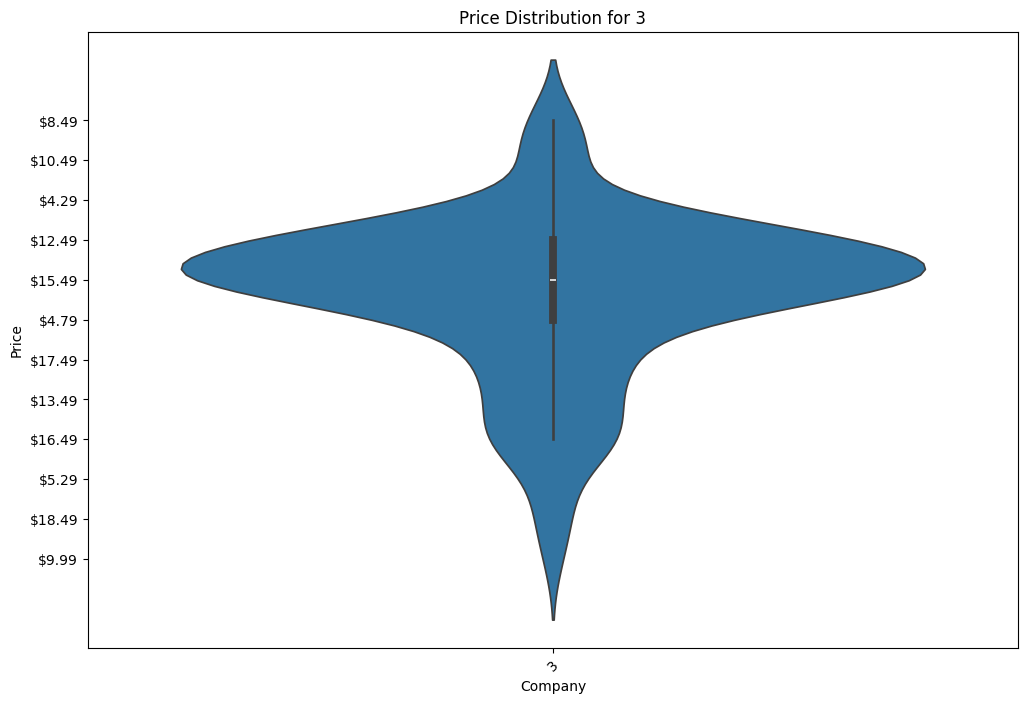

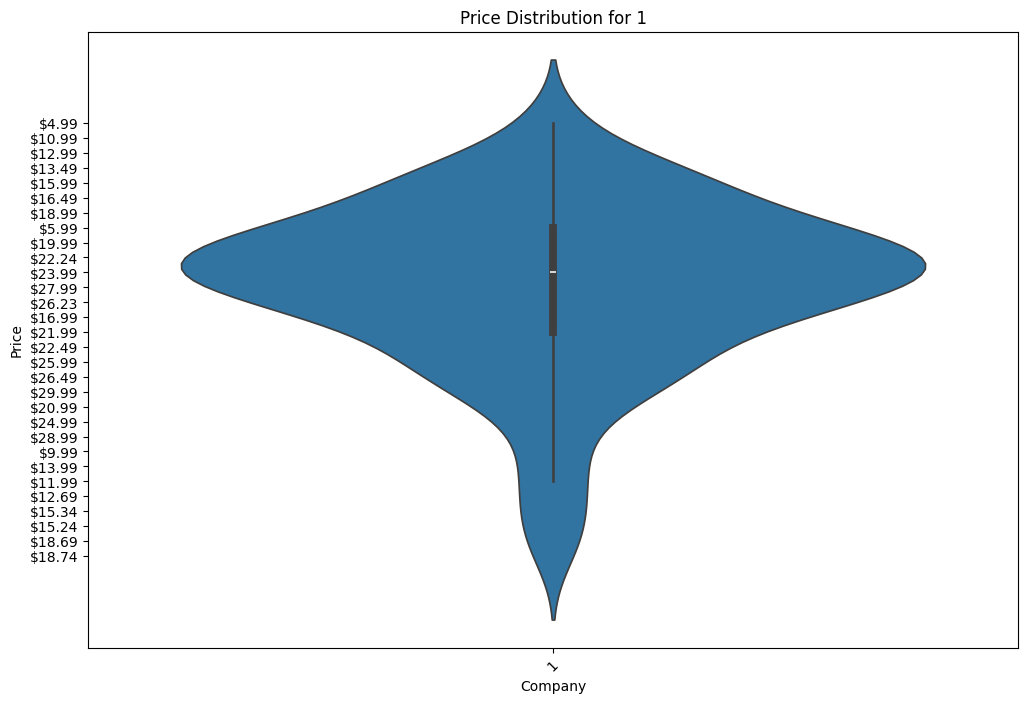

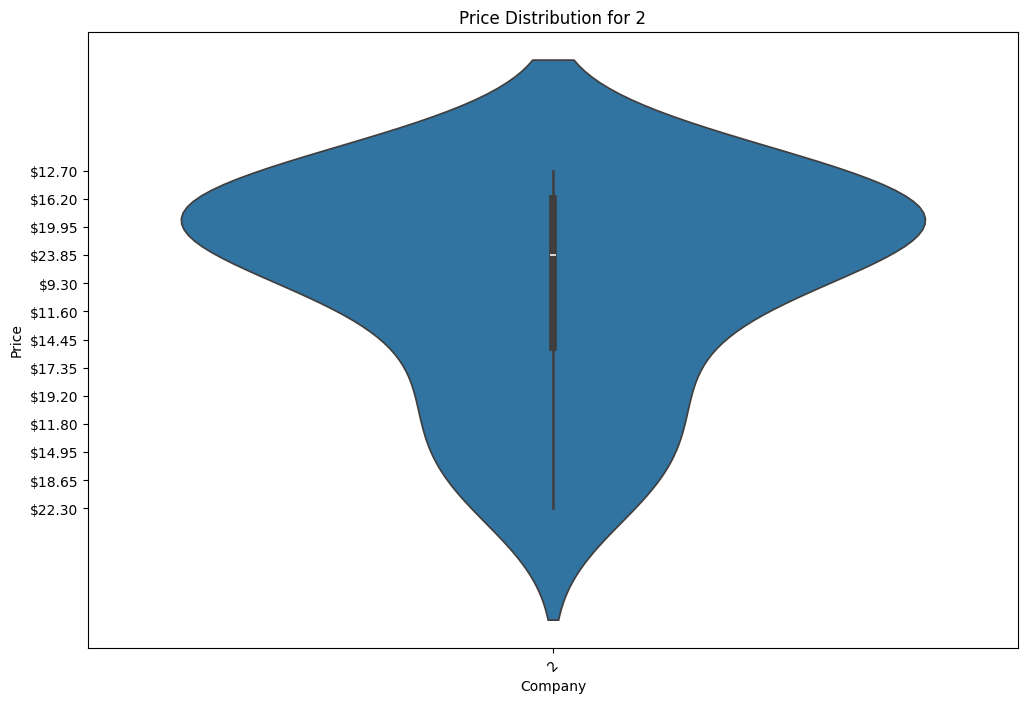

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd # Import pandas

# Define the column names
columns = ['Company', 'Pizza Name', 'Type', 'Size']

# Assuming X is currently a NumPy array, convert it to a DataFrame
X = pd.DataFrame(data, columns=columns)

'''
# Improved visualization with boxplot
for column in X.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=X[column], y=y)
    plt.title(f'{column} vs. Price')
    plt.xlabel(column)
    plt.ylabel('Price')
    plt.xticks(rotation=45)  # Rotate x labels for readability if needed
    plt.show()

    # Improved visualization with violin plot
for column in X.columns:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x=X[column], y=y)
    plt.title(f'{column} vs. Price')
    plt.xlabel(column)
    plt.ylabel('Price')
    plt.xticks(rotation=45)
    plt.show()
'''


import matplotlib.pyplot as plt
import seaborn as sns

# Loop over unique company names
for company in X['Company'].unique():
    plt.figure(figsize=(12, 8))

    # Filter data for the current company
    company_data = X[X['Company'] == company].copy()
    company_data['Price'] = y[X['Company'] == company]

    # Use sns.violinplot with 'Company' as x and 'Price' as y
    sns.violinplot(x='Company', y='Price', data=company_data)

    # Set plot title and labels
    plt.title(f'Price Distribution for {company}')
    plt.xlabel('Company')
    plt.ylabel('Price')
    plt.xticks([0], [company], rotation=45)  # Ensure the x-axis label is the company name

    # Show the plot
    plt.show()


